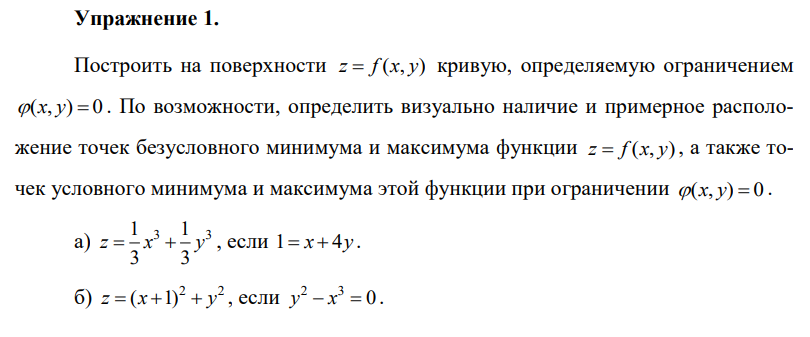

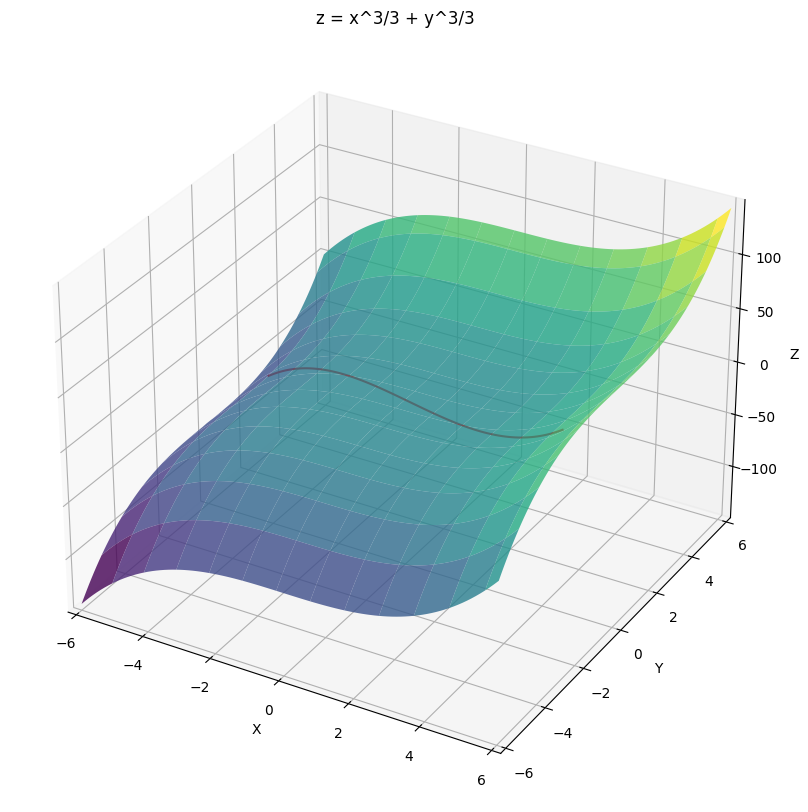

In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#a)
x = np.linspace(-5, 5, 100)
y = (1 - x) / 4
z = x**3/3 + y**3/3
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')
ax.plot(x, y, z, 'r')
x1 = np.linspace(-6,6,100)
y1 = np.linspace(-6,6,100)
[x1,y1] = np.meshgrid(x1,y1)
z1 = lambda x1,y1: x1**3/3 + y1**3/3
Z = z1(x1,y1)
my_cmap = plt.get_cmap('viridis') 
surf = ax.plot_surface(x1,y1,Z,rstride = 8,cstride = 8,alpha = 0.8,cmap = my_cmap)
ax.set_xlabel('X-axis')
ax.set_xlim(-6, 6)
ax.set_ylabel('Y-axis')
ax.set_ylim(-6, 6)
ax.set_zlabel('Z-axis')
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('z = x^3/3 + y^3/3')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17908\2638912225.py:4: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(x**3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17908\2638912225.py:5: RuntimeWarning: invalid value encountered in sqrt
  y0 = -np.sqrt(x**3)


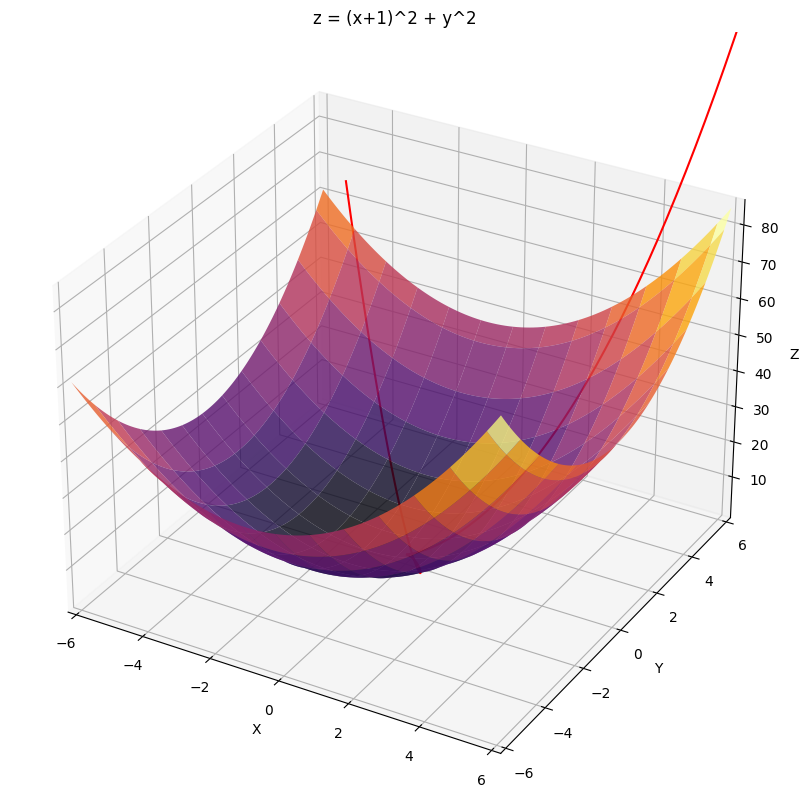

In [6]:
#b)

x = np.linspace(-5, 5, 100)
y = np.sqrt(x**3)
y0 = -np.sqrt(x**3)
z = (x+1)**2 + y**2
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')
ax.plot(x, y, z, 'r')
ax.plot(x, y0, z, 'r')
x1 = np.linspace(-6,6,100)
y1 = np.linspace(-6,6,100)
[x1,y1] = np.meshgrid(x1,y1)
z1 = lambda x1,y1: (x1+1)**2 + y1**2
Z = z1(x1,y1)
my_cmap = plt.get_cmap('inferno') 
surf = ax.plot_surface(x1,y1,Z,rstride = 8,cstride = 8,alpha = 0.8,cmap = my_cmap)
ax.set_xlabel('X-axis')
ax.set_xlim(-6, 6)
ax.set_ylabel('Y-axis')
ax.set_ylim(-6, 6)
ax.set_zlabel('Z-axis')
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('z = (x+1)^2 + y^2')
plt.show()

Прямой метод



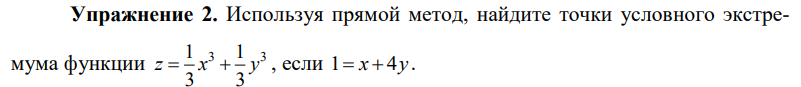

In [7]:
from sympy import symbols, diff, solve
x, y = symbols('x y')
f = x**3/3 + y**3/3
g = x + 4*y - 1
x_expr = solve(g, x)[0]
f_expr = f.subs(x, x_expr)
# Берем производную функции по y
df_dy = diff(f_expr, y)
# Решаем уравнение df_dy = 0 для нахождения точек экстремума
sols = solve(df_dy, y)
print(-4*sols[0]+1, -4*sols[1]+1)
print(sols)

1/9 -1/7
[2/9, 2/7]


Метод Лагранжа

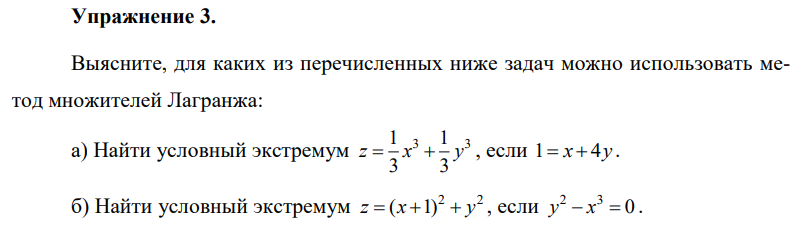

In [11]:
x, y, l = symbols('x y l')
def lagrangeChecker(grad_f, grad_g):
    # Определитель матрицы Гессе
    M_det = diff(grad_f[0], x) * diff(grad_f[1], y) - diff(grad_f[0], y) * diff(grad_f[1], x)
    # Проверка условия невырожденности матрицы Гессе и условия Лагранжа
    if M_det != 0 and solve(grad_g[0]+grad_f[1] + l * grad_f[0] + l * grad_f[1], (x, y, l)) != []:
        return True
    else:
        return False

print("А: ")
f = x**3/3 + y**3/3
g = x + 4*y - 1
grad_f = [x**2,y**2]
grad_g = [1,4]
if lagrangeChecker(grad_f, grad_g):
    print("Метод множителей Лагранжа применим")
else:
    print("Метод множителей Лагранжа не применим")
    
print("В: ")
f = (x+1)**2 + y**2
g = y**2 - x**3
grad_f = [2*x+2,2*y]
grad_g = [-3*x**2,2*y]
if lagrangeChecker(grad_f, grad_g):
    print("Метод множителей Лагранжа применим")
else:
    print("Метод множителей Лагранжа не применим")

А: 
Метод множителей Лагранжа применим
В: 
Метод множителей Лагранжа применим


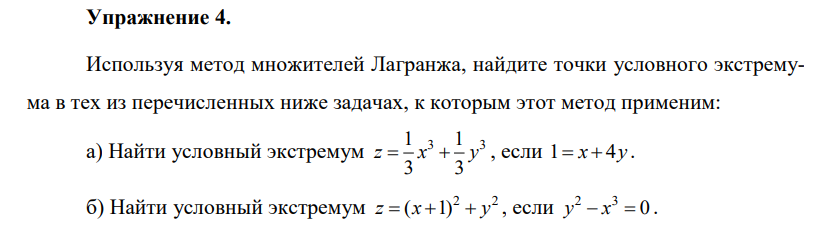

In [12]:
#a)
x, y, lam = symbols('x y lam')
f = x**3/3 + y**3/3
g = x + 4*y - 1
# Составляем уравнение Лагранжа
L = f + lam*g
# Берем частные производные по x, y и lambda
dx = diff(L, x)
dy = diff(L, y)
dlam = diff(L, lam)
# Решаем систему уравнений методом solve
sols = solve([dx, dy, g], [x, y, lam])
# Выводим найденные точки условного экстремума
print(sols)

[(-1/7, 2/7, -1/49), (1/9, 2/9, -1/81)]


In [13]:
#b)
x, y, lam = sp.symbols('x y lam')
f = (x+1)**2 + y**2
g = y**2 - x**3
# Составляем уравнение Лагранжа
L = f + lam*g
# Берем частные производные по x, y и lambda
dx = sp.diff(L, x)
dy = sp.diff(L, y)
dlam = sp.diff(L, lam)
# Решаем систему уравнений методом solve
sols = sp.solve([dx, dy, g], [x, y, lam])
# Выводим найденные точки условного экстремума
sp.pprint(sols)

#экстремума нет

⎡⎛                            ⎛    ⎛√5⎞⎞                   ⎛    ⎛√5⎞⎞    ⎞  ⎛ 
⎢⎜                            ⎜atan⎜──⎟⎟                   ⎜atan⎜──⎟⎟    ⎟  ⎜ 
⎢⎜               3/4 4 ___    ⎜    ⎝7 ⎠⎟    3/4 4 ___      ⎜    ⎝7 ⎠⎟    ⎟  ⎜ 
⎢⎜              2   ⋅╲╱ 3 ⋅cos⎜────────⎟   2   ⋅╲╱ 3 ⋅ⅈ⋅sin⎜────────⎟    ⎟  ⎜ 
⎢⎜  1   √5⋅ⅈ                  ⎝   2    ⎠                   ⎝   2    ⎠    ⎟  ⎜ 
⎢⎜- ─ - ────, - ──────────────────────── - ──────────────────────────, -1⎟, ⎜-
⎣⎝  3    3                 3                           3                 ⎠  ⎝ 

                         ⎛    ⎛√5⎞⎞                   ⎛    ⎛√5⎞⎞    ⎞  ⎛      
                         ⎜atan⎜──⎟⎟                   ⎜atan⎜──⎟⎟    ⎟  ⎜      
            3/4 4 ___    ⎜    ⎝7 ⎠⎟    3/4 4 ___      ⎜    ⎝7 ⎠⎟    ⎟  ⎜      
           2   ⋅╲╱ 3 ⋅cos⎜────────⎟   2   ⋅╲╱ 3 ⋅ⅈ⋅sin⎜────────⎟    ⎟  ⎜      
 1   √5⋅ⅈ                ⎝   2    ⎠                   ⎝   2    ⎠    ⎟  ⎜  1   
 ─ - ────, ──────────────────────── + ─────────────

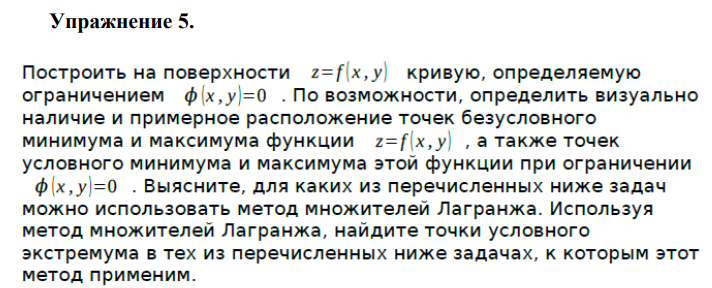

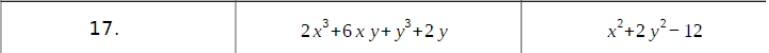

C:\Users\Admin\AppData\Local\Temp\ipykernel_17908\1344647553.py:7: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt((12 - x**2) / 2)


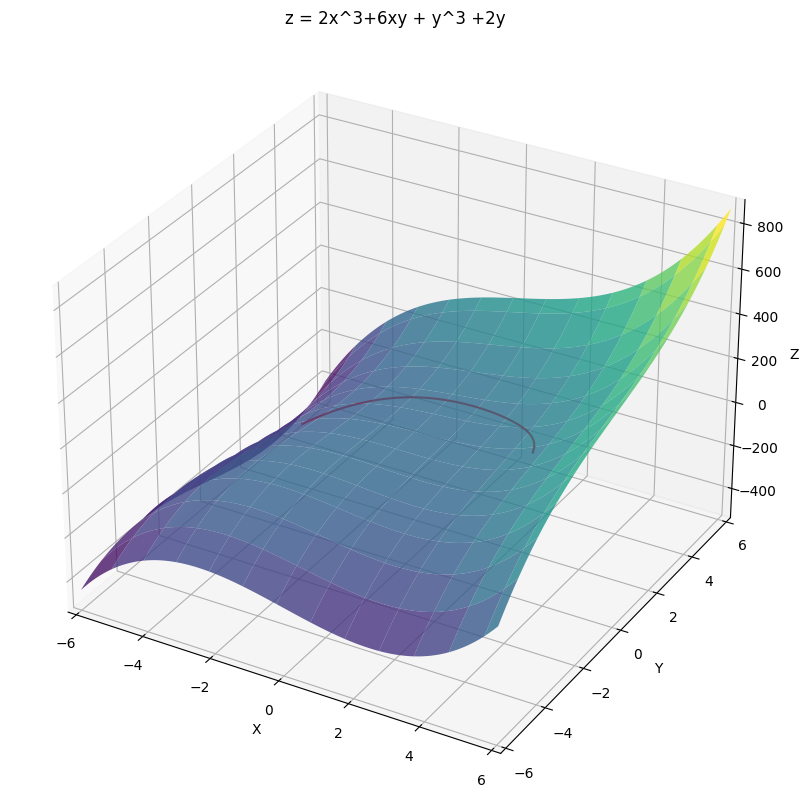

In [15]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#a)
#%matplotlib qt5
x = np.linspace(-5, 5, 100)
y = np.sqrt((12 - x**2) / 2)
z = 2*x**3+6*x*y + y**3 +2*y
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')
ax.plot(x, y, z, 'r')
x1 = np.linspace(-6,6,100)
y1 = np.linspace(-6,6,100)
[x1,y1] = np.meshgrid(x1,y1)
z1 = lambda x1,y1: 2*x1**3 + y1**3+6*x1*y1+2*y1
Z = z1(x1,y1)
my_cmap = plt.get_cmap('viridis') 
surf = ax.plot_surface(x1,y1,Z,rstride = 8,cstride = 8,alpha = 0.8,cmap = my_cmap)
ax.set_xlabel('X-axis')
ax.set_xlim(-6, 6)
ax.set_ylabel('Y-axis')
ax.set_ylim(-6, 6)
ax.set_zlabel('Z-axis')
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('z = 2x^3+6xy + y^3 +2y')
plt.show()

In [19]:
x, y, l = symbols('x y l')
def lagrangeChecker(grad_f, grad_g):
    # Определитель матрицы Гессе
    M_det = diff(grad_f[0], x) * diff(grad_f[1], y) - diff(grad_f[0], y) * diff(grad_f[1], x)
    # Проверка условия невырожденности матрицы Гессе и условия Лагранжа
    if M_det != 0 and solve(grad_g[0]+grad_f[1] + l * grad_f[0] + l * grad_f[1], (x, y, l)) != []:
        return True
    else:
        return False

f =2*x**3+6*x*y + y**3 +2*y
g = x**2+2*y**2-12
grad_f = [6*x**2+6*y,3*y**2+6*x+2]
grad_g = [1,4]
if lagrangeChecker(grad_f, grad_g):
    print("Метод множителей Лагранжа применим")
else:
    print("Метод множителей Лагранжа не применим")

Метод множителей Лагранжа применим


In [20]:
#a)
x, y, lam = symbols('x y lam')
f = 2*x**3+6*x*y + y**3 +2*y
g = x**2+2*y**2-12
# Составляем уравнение Лагранжа
L = f + lam*g
# Берем частные производные по x, y и lambda
dx = diff(L, x)
dy = diff(L, y)
dlam = diff(L, lam)
# Решаем систему уравнений методом solve
sols = solve([dx, dy, g], [x, y, lam])
# Выводим найденные точки условного экстремума
print(sols)
#нет экстремумов

[]


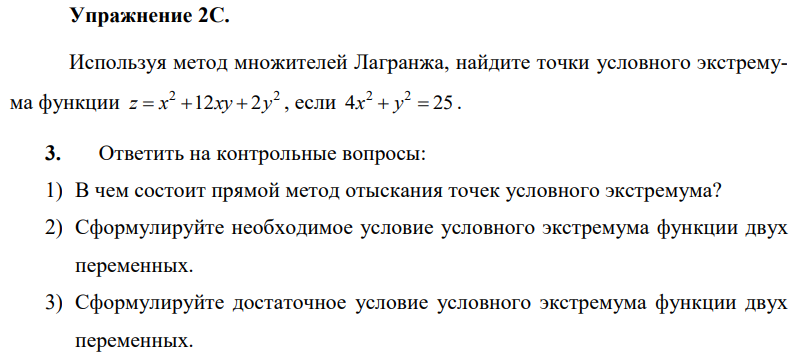

In [21]:
x, y, lam = symbols('x y lam')
f = x**2+12*x*y+2*y**2
g = 4*x**2+y**2-25
# Составляем уравнение Лагранжа
L = f + lam*g
# Берем частные производные по x, y и lambda
dx = diff(L, x)
dy = diff(L, y)
dlam = diff(L, lam)
# Решаем систему уравнений методом solve
sols = solve([dx, dy, g], [x, y, lam])
# Выводим найденные точки условного экстремума
print(sols)

[(-2, 3, 2), (-3/2, -4, -17/4), (3/2, 4, -17/4), (2, -3, 2)]
